In [1]:
# Load packages
import pandas as pd

In [2]:
pd.__version__

'0.19.1'

In [9]:
import datetime as dt

In [2]:
# Load the data file
df = pd.read_csv('../data/311_Requests_Oct15_Nov20.csv')

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,17,40,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df['Format Date'] = pd.to_datetime(df['Created Date'])

In [11]:
df['Format Date'][0].hour

0

In [12]:
df['Format Date'][0]

Timestamp('2016-10-15 00:00:00')

In [14]:
df['Hour'] = df['Format Date'].dt.hour

In [16]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Format Date,Hour
0,34545331,10/15/2016 12:00:00 AM,12/05/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),10302,BURNSIDE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.624088,-74.134018,"(40.62408824389004, -74.13401828617904)",2016-10-15,0
1,34547515,10/15/2016 12:00:00 AM,12/01/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11215,29-37 PROSPECT PARK W,...,NaN,NaN,NaN,NaN,NaN,40.670089,-73.972268,"(40.670088736829285, -73.9722680064772)",2016-10-15,0
2,34546793,10/15/2016 12:00:00 AM,12/02/2016 11:23:13 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,11215,271-271 PROSPECT PARK W,...,NaN,NaN,NaN,NaN,NaN,40.658321,-73.982019,"(40.658321064041786, -73.98201865223372)",2016-10-15,0
3,34546229,10/15/2016 12:00:00 AM,12/02/2016 11:23:13 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,11215,271 PROSPECT PARK W,...,NaN,NaN,NaN,NaN,NaN,40.658274,-73.981882,"(40.65827438128601, -73.98188170535671)",2016-10-15,0
4,34547695,10/15/2016 12:00:00 AM,11/25/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11216,CLIFTON PLACE,...,NaN,NaN,NaN,NaN,NaN,40.688586,-73.956056,"(40.688586206395534, -73.9560556909379)",2016-10-15,0


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
df.groupby('Borough')['Unique Key'].count().sort_values(ascending=False)

Borough
BROOKLYN         69626
MANHATTAN        50931
QUEENS           49324
BRONX            43453
STATEN ISLAND    10850
Unspecified       8486
Name: Unique Key, dtype: int64

In [26]:
df[df['Complaint Type'].str.contains('Derelict Vehicle')].groupby('Complaint Type')['Unique Key'].count()

Complaint Type
Derelict Vehicle     2854
Derelict Vehicles    2804
Name: Unique Key, dtype: int64

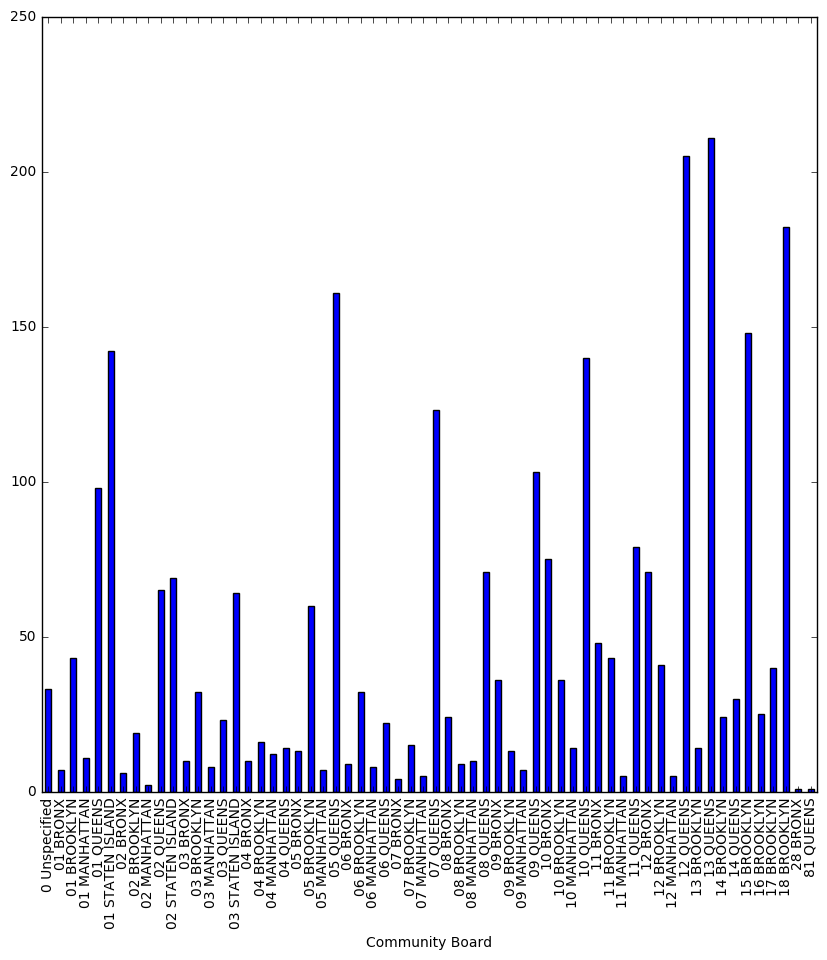

In [29]:
df[df['Complaint Type']=='Derelict Vehicle'].groupby('Community Board')['Unique Key'].count().plot(kind='bar',figsize=(10,10))

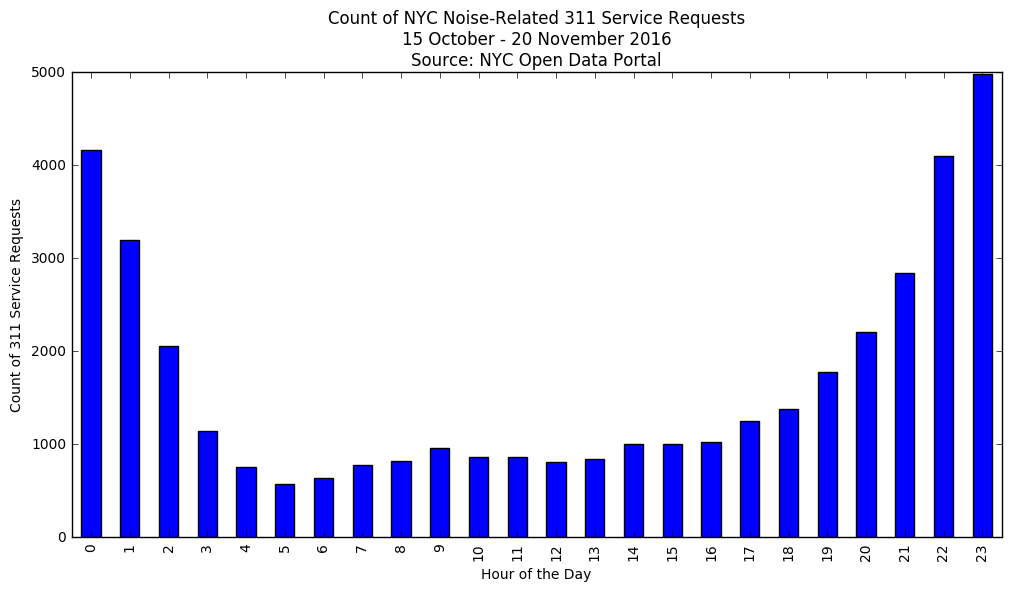

In [47]:
ax = df[df['Complaint Type'].str.contains('Noise')].groupby('Hour')['Unique Key'].count().plot(kind='bar',figsize=(12,6),title='Count of NYC Noise-Related 311 Service Requests\n15 October - 20 November 2016\nSource: NYC Open Data Portal')
ax.set_ylabel("Count of 311 Service Requests")
ax.set_xlabel("Hour of the Day")

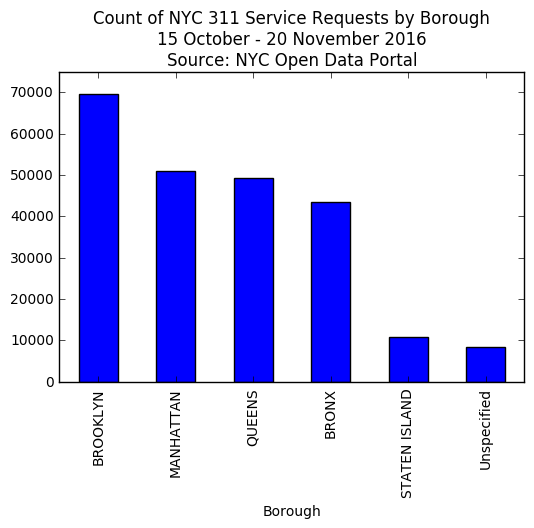

In [61]:
df.groupby('Borough')['Unique Key'].count().sort_values(ascending=False).plot(kind='bar',ylim=(0,75000),title='Count of NYC 311 Service Requests by Borough\n15 October - 20 November 2016\nSource: NYC Open Data Portal')

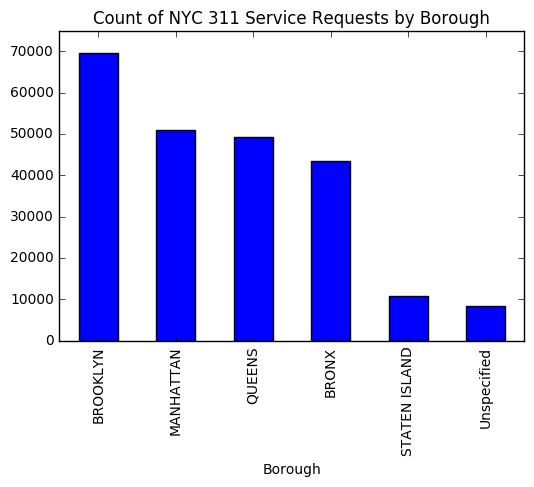

In [65]:
df.groupby('Borough')['Unique Key']\
	.count()\
	.sort_values(ascending=False)\
	.plot(kind='bar',ylim=(0,75000),\
          title='Count of NYC 311 Service Requests by Borough')

In [11]:
df['Created Date'][0]

'10/15/2016 12:00:00 AM'

In [3]:
# Explore the dataset
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,34545331,10/15/2016 12:00:00 AM,12/05/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),10302,BURNSIDE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.624088,-74.134018,"(40.62408824389004, -74.13401828617904)"
1,34547515,10/15/2016 12:00:00 AM,12/01/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11215,29-37 PROSPECT PARK W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670089,-73.972268,"(40.670088736829285, -73.9722680064772)"
2,34546793,10/15/2016 12:00:00 AM,12/02/2016 11:23:13 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,11215,271-271 PROSPECT PARK W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.658321,-73.982019,"(40.658321064041786, -73.98201865223372)"
3,34546229,10/15/2016 12:00:00 AM,12/02/2016 11:23:13 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,11215,271 PROSPECT PARK W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.658274,-73.981882,"(40.65827438128601, -73.98188170535671)"
4,34547695,10/15/2016 12:00:00 AM,11/25/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11216,CLIFTON PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688586,-73.956056,"(40.688586206395534, -73.9560556909379)"


In [8]:
# calculate summary statistics
df.describe()

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
count,2.326700e+05,2.138100e+05,213810.000000,0.0,213810.000000,213810.000000
mean,3.468117e+07,1.004377e+06,206137.224559,NaN,40.732426,-73.927338
std,7.979803e+04,2.176142e+04,31373.031910,NaN,0.086112,0.078482
min,3.453538e+07,9.133570e+05,121152.000000,NaN,40.498949,-74.254937
25%,3.461227e+07,9.920290e+05,182850.000000,NaN,40.668509,-73.971945
50%,3.468054e+07,1.003536e+06,204014.000000,NaN,40.726578,-73.930368
75%,3.475026e+07,1.016421e+06,235269.000000,NaN,40.812398,-73.883831
max,3.506086e+07,1.067220e+06,271861.000000,NaN,40.912828,-73.700597


In [14]:
# Get the list of column names
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [5]:
# Select only the columns you want from the data
df_subset = df[['Unique Key','Created Date','Closed Date','Agency','Complaint Type','Descriptor','Location Type','Community Board','Borough']]

In [30]:
df['Created Date'].max()

'11/20/2016 12:00:00 AM'

In [11]:
df[['Unique Key','Created Date','Closed Date','Agency','Complaint Type','Descriptor','Location Type', 'Community Board','Borough']]

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Community Board,Borough
0,34545331,10/15/2016 12:00:00 AM,12/05/2016 12:00:00 AM,DOHMH,Rodent,Rat Sighting,Other (Explain Below),Unspecified STATEN ISLAND,STATEN ISLAND
1,34547515,10/15/2016 12:00:00 AM,12/01/2016 12:00:00 AM,DOHMH,Rodent,Rat Sighting,Other (Explain Below),Unspecified BROOKLYN,BROOKLYN
2,34546793,10/15/2016 12:00:00 AM,12/02/2016 11:23:13 AM,DOHMH,Rodent,Mouse Sighting,3+ Family Apt. Building,Unspecified BROOKLYN,BROOKLYN
3,34546229,10/15/2016 12:00:00 AM,12/02/2016 11:23:13 AM,DOHMH,Rodent,Mouse Sighting,3+ Family Apt. Building,Unspecified BROOKLYN,BROOKLYN
4,34547695,10/15/2016 12:00:00 AM,11/25/2016 12:00:00 AM,DOHMH,Rodent,Rat Sighting,Other (Explain Below),Unspecified BROOKLYN,BROOKLYN
5,34544547,10/15/2016 12:00:00 AM,11/10/2016 12:39:53 PM,DOHMH,Rodent,Rat Sighting,Other (Explain Below),Unspecified MANHATTAN,MANHATTAN
6,34548641,10/15/2016 12:00:00 AM,11/07/2016 12:00:00 AM,DOHMH,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,01 BRONX,BRONX
7,34548493,10/15/2016 12:00:00 AM,NaN,DOHMH,Unsanitary Animal Pvt Property,Dog,1-2 Family Dwelling,12 QUEENS,QUEENS
8,34548259,10/15/2016 12:00:00 AM,11/04/2016 12:00:00 AM,DOHMH,Rodent,Rat Sighting,3+ Family Apt. Building,Unspecified QUEENS,QUEENS
9,34543138,10/15/2016 12:00:00 AM,11/07/2016 12:00:00 AM,DOHMH,Rodent,Rat Sighting,3+ Family Mixed Use Building,12 MANHATTAN,MANHATTAN


In [12]:
type(['Unique Key','Created Date','Closed Date','Agency','Complaint Type','Descriptor','Location Type', 'Community Board','Borough'])

list

In [15]:
type(df.plot)

pandas.tools.plotting.FramePlotMethods

In [16]:
1/2

0.5

In [70]:
df[df['Complaint Type'].str.contains('Derelict Veh')].groupby('Complaint Type')['Unique Key'].count()

Complaint Type
Derelict Vehicle     2854
Derelict Vehicles    2804
Name: Unique Key, dtype: int64

In [71]:
df[df['Complaint Type'].str.contains('Noise')].groupby('Complaint Type')['Unique Key'].count()

Complaint Type
Collection Truck Noise         27
Noise                        6523
Noise - Commercial           5212
Noise - Helicopter             97
Noise - House of Worship      104
Noise - Park                  226
Noise - Residential         20697
Noise - Street/Sidewalk      4553
Noise - Vehicle              2441
Name: Unique Key, dtype: int64

In [75]:
df[df['Complaint Type']=='Noise']['Unique Key'].count()

6523

In [78]:
df[df['Complaint Type'].str.contains('Derelict Vehicle')].groupby('Borough')['Unique Key'].count()

Borough
BRONX             670
BROOKLYN         1969
MANHATTAN         178
QUEENS           2387
STATEN ISLAND     421
Unspecified        33
Name: Unique Key, dtype: int64

In [80]:
df[df['Complaint Type'].str.contains('Derelict Vehicle')].groupby('Community Board')['Unique Key'].count().sort_values(ascending=False)

Community Board
12 QUEENS           447
18 BROOKLYN         444
13 QUEENS           319
05 BROOKLYN         271
01 STATEN ISLAND    239
15 BROOKLYN         235
10 QUEENS           234
05 QUEENS           227
01 QUEENS           224
09 QUEENS           211
07 QUEENS           181
17 BROOKLYN         168
12 BRONX            138
02 QUEENS           136
10 BRONX            129
08 QUEENS           109
02 STATEN ISLAND    103
11 BRONX             97
11 QUEENS            90
14 BROOKLYN          89
03 QUEENS            88
12 BROOKLYN          83
11 BROOKLYN          82
09 BRONX             80
01 BROOKLYN          80
03 STATEN ISLAND     79
03 BROOKLYN          75
16 BROOKLYN          65
09 BROOKLYN          61
10 BROOKLYN          59
                   ... 
06 BRONX             49
14 QUEENS            48
04 QUEENS            44
08 BROOKLYN          42
07 BROOKLYN          36
02 BROOKLYN          35
02 BRONX             35
0 Unspecified        33
08 BRONX             33
10 MANHATTAN         32


In [20]:
df[df['Complaint Type'].str.contains('Derelict Vehicle')].groupby(['Borough','Community Board'])['Unique Key'].agg({'count':'count'}).sort('Brough').sort_values('count')

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


KeyError: 'Brough'